# Analyzing New York City (NYC) COVID-19 Mortality Data by Borough
## Description to go here tbd

**Import and run NYC_COVID-19_Mortality.py script**

In [1]:
%run NYC_COVID-19_Mortality.py

         Borough  COVID-19 Death Count  2020 Total Population  \
0      Manhattan                6189.0                1694251   
1          Bronx                8528.0                1472654   
2       Brooklyn               14267.0                2736074   
3         Queens               13465.0                2405464   
4  Staten Island                2751.0                 495747   
5       Citywide               45200.0                8804190   

   Mortality Rate (per 1,000 population)  
0                               3.652942  
1                               5.790905  
2                               5.214406  
3                               5.597673  
4                               5.549202  
5                               5.133919  


/Users/emily/code/NYC_COVID_project/NYC_COVID-19_Mortality.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nyc_census = nyc_census.append(new_pop_row, ignore_index=True)


In [2]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# View Mortality Rates for each borough and citywide in a dataframe
death_census_data_combined

,Borough,COVID-19 Death Count,2020 Total Population,"Mortality Rate (per 1,000 population)"
0,Manhattan,6189.0,1694251,3.652942
1,Bronx,8528.0,1472654,5.790905
2,Brooklyn,14267.0,2736074,5.214406
3,Queens,13465.0,2405464,5.597673
4,Staten Island,2751.0,495747,5.549202
5,Citywide,45200.0,8804190,5.133919


In [4]:
deaths_by_day
deaths_by_week = np.arange(0, 1172, 7)
weekly_deaths = deaths_by_day.iloc[deaths_by_week]
weekly_deaths

,date_of_interest,DEATH_COUNT,BX_DEATH_COUNT,BK_DEATH_COUNT,MN_DEATH_COUNT,QN_DEATH_COUNT,SI_DEATH_COUNT
0,02/29/2020,0,0,0,0,0,0
7,03/07/2020,0,0,0,0,0,0
14,03/14/2020,3,0,1,1,1,0
21,03/21/2020,51,14,14,6,14,3
28,03/28/2020,323,74,92,34,109,14
...,...,...,...,...,...,...,...
1141,04/15/2023,2,1,0,0,1,0
1148,04/22/2023,1,0,0,0,1,0
1155,04/29/2023,1,0,0,1,0,0
1162,05/06/2023,1,1,0,0,0,0


In [5]:
first_death = deaths_by_day[deaths_by_day.iloc[:, 1] > 0].index[0]
first_death
print(deaths_by_day.iloc[11])

date_of_interest    03/11/2020
DEATH_COUNT                  1
BX_DEATH_COUNT               0
BK_DEATH_COUNT               0
MN_DEATH_COUNT               0
QN_DEATH_COUNT               1
SI_DEATH_COUNT               0
Name: 11, dtype: object


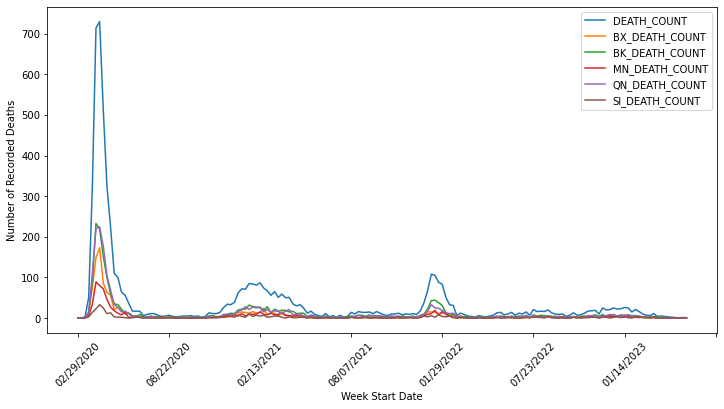

In [6]:
weekly_deaths.plot(x = 'date_of_interest', y = ['DEATH_COUNT','BX_DEATH_COUNT','BK_DEATH_COUNT','MN_DEATH_COUNT','QN_DEATH_COUNT','SI_DEATH_COUNT'], kind='line', figsize = (12,6))

# Add labels and title
plt.xticks(rotation = 45)
plt.xlabel('Week Start Date')
plt.ylabel('Number of Recorded Deaths')
# Display the plot
plt.show()

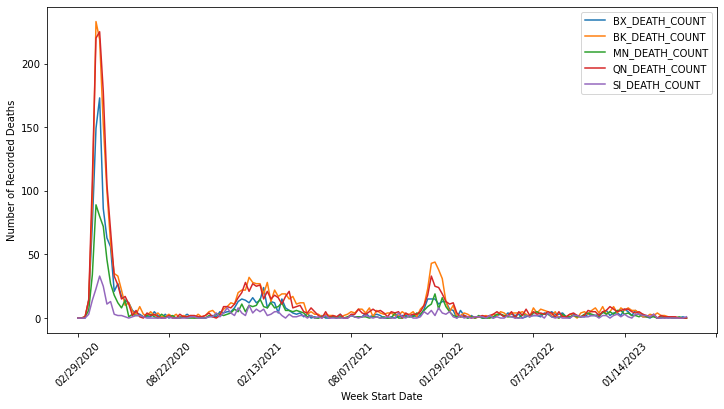

In [7]:
weekly_deaths.plot(x = 'date_of_interest', y = ['BX_DEATH_COUNT','BK_DEATH_COUNT','MN_DEATH_COUNT','QN_DEATH_COUNT','SI_DEATH_COUNT'], kind='line', figsize = (12,6))

# Add labels and title
plt.xticks(rotation = 45)
plt.xlabel('Week Start Date')
plt.ylabel('Number of Recorded Deaths')
# Display the plot
plt.show()

In [8]:
weekly_deaths

,date_of_interest,DEATH_COUNT,BX_DEATH_COUNT,BK_DEATH_COUNT,MN_DEATH_COUNT,QN_DEATH_COUNT,SI_DEATH_COUNT
0,02/29/2020,0,0,0,0,0,0
7,03/07/2020,0,0,0,0,0,0
14,03/14/2020,3,0,1,1,1,0
21,03/21/2020,51,14,14,6,14,3
28,03/28/2020,323,74,92,34,109,14
...,...,...,...,...,...,...,...
1141,04/15/2023,2,1,0,0,1,0
1148,04/22/2023,1,0,0,0,1,0
1155,04/29/2023,1,0,0,1,0,0
1162,05/06/2023,1,1,0,0,0,0


In [9]:
nyc_census

,Borough,2020 Total Population
0,Manhattan,1694251
1,Bronx,1472654
2,Brooklyn,2736074
3,Queens,2405464
4,Staten Island,495747
5,Citywide,8804190


In [10]:
MN_pop = nyc_census.loc[0, '2020 Total Population']
print(MN_pop)

BX_pop = nyc_census.loc[1, '2020 Total Population']
print(BX_pop)

BK_pop = nyc_census.loc[2, '2020 Total Population']
print(BK_pop)

QN_pop = nyc_census.loc[3, '2020 Total Population']
print(QN_pop)

SI_pop = nyc_census.loc[4, '2020 Total Population']
print(SI_pop)

NYC_pop = nyc_census.loc[5, '2020 Total Population']
print(NYC_pop)

1694251
1472654
2736074
2405464
495747
8804190


In [11]:
weekly_deaths_per1k = weekly_deaths.copy()
weekly_deaths_per1k = weekly_deaths_per1k.rename(columns={'DEATH_COUNT': 'NYC_DEATH_COUNT'})
weekly_deaths_per1k

,date_of_interest,NYC_DEATH_COUNT,BX_DEATH_COUNT,BK_DEATH_COUNT,MN_DEATH_COUNT,QN_DEATH_COUNT,SI_DEATH_COUNT
0,02/29/2020,0,0,0,0,0,0
7,03/07/2020,0,0,0,0,0,0
14,03/14/2020,3,0,1,1,1,0
21,03/21/2020,51,14,14,6,14,3
28,03/28/2020,323,74,92,34,109,14
...,...,...,...,...,...,...,...
1141,04/15/2023,2,1,0,0,1,0
1148,04/22/2023,1,0,0,0,1,0
1155,04/29/2023,1,0,0,1,0,0
1162,05/06/2023,1,1,0,0,0,0


In [12]:
columns = weekly_deaths_per1k.columns.tolist()
columns.append(columns.pop(1))
weekly_deaths_per1k = weekly_deaths_per1k[columns]
weekly_deaths_per1k

,date_of_interest,BX_DEATH_COUNT,BK_DEATH_COUNT,MN_DEATH_COUNT,QN_DEATH_COUNT,SI_DEATH_COUNT,NYC_DEATH_COUNT
0,02/29/2020,0,0,0,0,0,0
7,03/07/2020,0,0,0,0,0,0
14,03/14/2020,0,1,1,1,0,3
21,03/21/2020,14,14,6,14,3,51
28,03/28/2020,74,92,34,109,14,323
...,...,...,...,...,...,...,...
1141,04/15/2023,1,0,0,1,0,2
1148,04/22/2023,0,0,0,1,0,1
1155,04/29/2023,0,0,1,0,0,1
1162,05/06/2023,1,0,0,0,0,1


In [13]:
boroughs = {
    'Bronx': {
        'prefix': 'BX',
        'population': BX_pop,
    },
    'Brooklyn': {
        'prefix': 'BK',
        'population': BK_pop,
    },
    'Manhattan': {
        'prefix': 'MN',
        'population': MN_pop,
    },
    'Queens': {
        'prefix': 'QN',
        'population': QN_pop,
    },
    'Staten Island': {
        'prefix': 'SI',
        'population': SI_pop,
    },
    'NYC': {
        'prefix': 'NYC',
        'population': NYC_pop,
    }
}

def compute_deaths_per_1k(borough_name):
    borough = boroughs[borough_name]
    death_count_column_name = borough['prefix'] + '_DEATH_COUNT'
    deaths_per_1k = weekly_deaths_per1k.loc[0:1169, death_count_column_name] / borough['population'] * 1000
    return deaths_per_1k

In [14]:
weekly_deaths_per1k.shape[1]

7

In [15]:
weekly_deaths_per1k

,date_of_interest,BX_DEATH_COUNT,BK_DEATH_COUNT,MN_DEATH_COUNT,QN_DEATH_COUNT,SI_DEATH_COUNT,NYC_DEATH_COUNT
0,02/29/2020,0,0,0,0,0,0
7,03/07/2020,0,0,0,0,0,0
14,03/14/2020,0,1,1,1,0,3
21,03/21/2020,14,14,6,14,3,51
28,03/28/2020,74,92,34,109,14,323
...,...,...,...,...,...,...,...
1141,04/15/2023,1,0,0,1,0,2
1148,04/22/2023,0,0,0,1,0,1
1155,04/29/2023,0,0,1,0,0,1
1162,05/06/2023,1,0,0,0,0,1


In [16]:
new_column_index = 2
for borough_name, borough in boroughs.items():
    new_column_name = borough['prefix'] + '_deaths_per1k'
    new_column_value = compute_deaths_per_1k(borough_name)
    weekly_deaths_per1k.insert(new_column_index, new_column_name, new_column_value)
    new_column_index += 2

In [17]:
weekly_deaths_per1k.shape[1]

13

In [18]:
weekly_deaths_per1k

,date_of_interest,BX_DEATH_COUNT,BX_deaths_per1k,BK_DEATH_COUNT,BK_deaths_per1k,MN_DEATH_COUNT,MN_deaths_per1k,QN_DEATH_COUNT,QN_deaths_per1k,SI_DEATH_COUNT,SI_deaths_per1k,NYC_DEATH_COUNT,NYC_deaths_per1k
0,02/29/2020,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
7,03/07/2020,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
14,03/14/2020,0,0.000000,1,0.000365,1,0.000590,1,0.000416,0,0.000000,3,0.000341
21,03/21/2020,14,0.009507,14,0.005117,6,0.003541,14,0.005820,3,0.006051,51,0.005793
28,03/28/2020,74,0.050249,92,0.033625,34,0.020068,109,0.045314,14,0.028240,323,0.036687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,04/15/2023,1,0.000679,0,0.000000,0,0.000000,1,0.000416,0,0.000000,2,0.000227
1148,04/22/2023,0,0.000000,0,0.000000,0,0.000000,1,0.000416,0,0.000000,1,0.000114
1155,04/29/2023,0,0.000000,0,0.000000,1,0.000590,0,0.000000,0,0.000000,1,0.000114
1162,05/06/2023,1,0.000679,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,0.000114


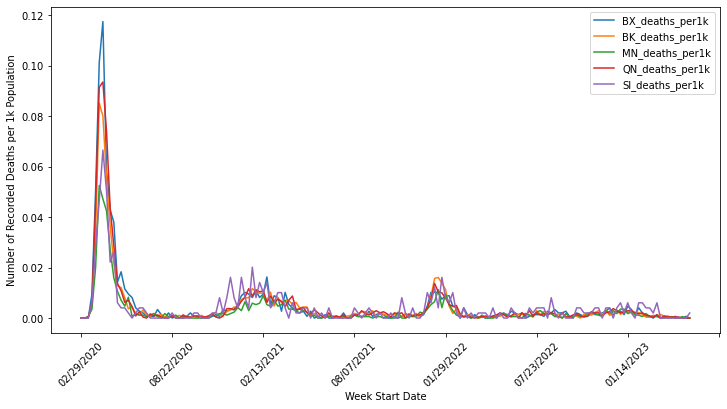

In [19]:
weekly_deaths_per1k.plot(x = 'date_of_interest', y = ['BX_deaths_per1k','BK_deaths_per1k','MN_deaths_per1k','QN_deaths_per1k','SI_deaths_per1k'], kind='line', figsize = (12,6))

# Add labels and title
plt.xticks(rotation = 45)
plt.xlabel('Week Start Date')
plt.ylabel('Number of Recorded Deaths per 1k Population')
# Display the plot
plt.show()

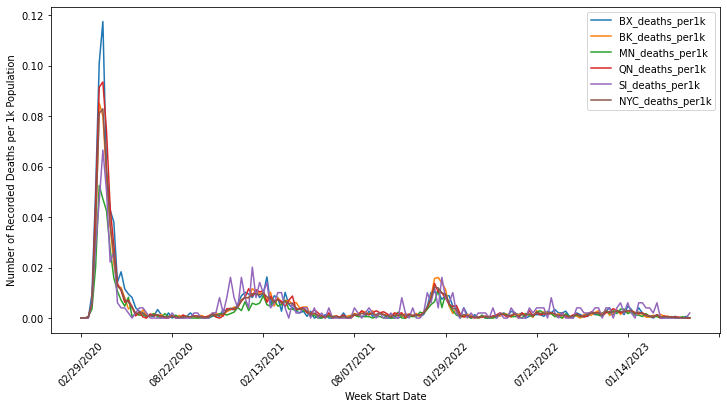

In [21]:
weekly_deaths_per1k.plot(x = 'date_of_interest', y = ['BX_deaths_per1k','BK_deaths_per1k','MN_deaths_per1k','QN_deaths_per1k','SI_deaths_per1k', 'NYC_deaths_per1k'], kind='line', figsize = (12,6))

# Add labels and title
plt.xticks(rotation = 45)
plt.xlabel('Week Start Date')
plt.ylabel('Number of Recorded Deaths per 1k Population')
# Display the plot
plt.show()